In [3]:
import os
import csv
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = r"./" # path to your data

In [5]:
def load_data(DATA_PATH, filename):
    dataset_name = []
    test_f1 = []
    
    with open(os.path.join(DATA_PATH, filename), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip the header
        for row in csv_reader:
            dataset_name.append(row[2])
            test_f1.append(float(row[3]))
    
    return dataset_name, test_f1



### First Tuning Round

In [6]:
dataset_name, test_f1 = load_data(DATA_PATH, "RESULTS_TUNING.csv")
len(dataset_name), len(test_f1)

(1440, 1440)

In [1]:
data = {}
for dataset, f_score in zip(dataset_name, test_f1):
    if dataset not in data:
        data[dataset] = []
    data[dataset].append(f_score)

dataset_names = list(data.keys())
f1_scores = list(data.values())
print(dataset_names)

# Create a box plot to visualize the F1 Score
fig, ax = plt.subplots(figsize=(4, 2))
# ax.set_title('F1 Score Distribution per Dataset')


ax.boxplot(f1_scores, labels=dataset_names, vert=True, positions=[0, 1, 2, 3, 4 ]) # 
print(ax.get_xticklabels())
ax.set_xticklabels(["(1) Raw Data", "(2) Clean Data", "(3) Subset Features", "(4) MI Score Features", "(5) Lasso Features"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 10,  fontsize=8)

ax.set_ylabel('Cross-validated F1 Score', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=8)
plt.savefig("boxplot.pdf", bbox_inches='tight')
plt.show()

### Second Tuning Round

In [14]:
dataset_name, test_f1 = load_data(DATA_PATH, "SECOND_TUNING.csv")

['train_data_full.npy', 'train_data_curated.npy']
[Text(1, 0, 'train_data_full.npy'), Text(2, 0, 'train_data_curated.npy')]


C:\Users\lucas\AppData\Local\Temp\ipykernel_24632\3151831773.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=8)


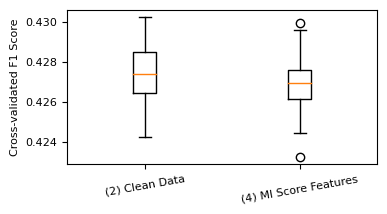

In [17]:
data = {}
for dataset, f_score in zip(dataset_name, test_f1):
    if dataset not in data:
        data[dataset] = []
    data[dataset].append(f_score)

dataset_names = list(data.keys())
f1_scores = list(data.values())
print(dataset_names)

# Create a box plot to visualize the F1 Score
fig, ax = plt.subplots(figsize=(4, 2))
# ax.set_title('F1 Score Distribution per Dataset')

ax.boxplot(f1_scores, labels=dataset_names, vert=True,) # 
print(ax.get_xticklabels())
ax.set_xticklabels(["(2) Clean Data","(4) MI Score Features"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 10,  fontsize=8)

ax.set_ylabel('Cross-validated F1 Score', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=8)
# plt.savefig("boxplot_2.pdf", bbox_inches='tight')
plt.show()